In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../data/raw/credit_risk_dataset.csv")
display(df.head())
display(df.info())
display(df.describe())

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


None

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


# Exploratory Data Analysis

## Univariate Analysis

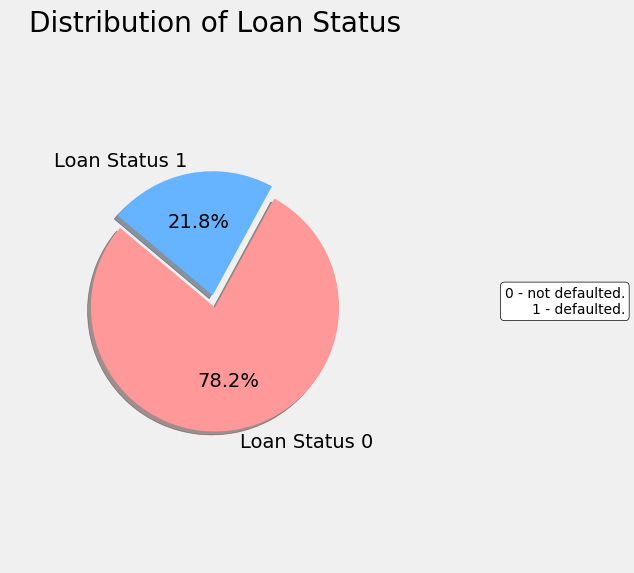

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame assuming df is your DataFrame and "loan_status" is the target variable
# df = pd.DataFrame({
#     'loan_status': [0, 1, 0, 1, 1, 0, 1, 0, 0, 1]  # Example data
# })

# Count the values of "loan_status"
loan_status_counts = df['loan_status'].value_counts()

# Create labels and sizes for the pie chart
labels = ['Loan Status 0', 'Loan Status 1']
sizes = [loan_status_counts[0], loan_status_counts[1]]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice (Loan Status 0)

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Distribution of Loan Status')

# Add annotation
annotation = (
    "0 - not defaulted.\n"
    "1 - defaulted."
)
plt.annotate(annotation, xy=(1, 0.5), xytext=(1.5, 0.5),
    textcoords='axes fraction', ha='right', va='center', fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")
)

# Show the plot
plt.tight_layout()
plt.show()


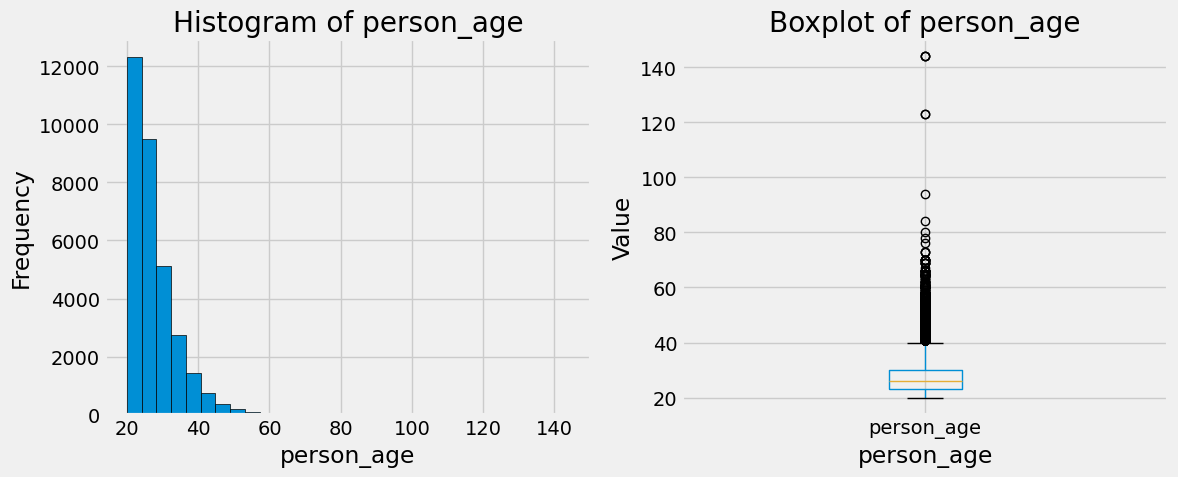

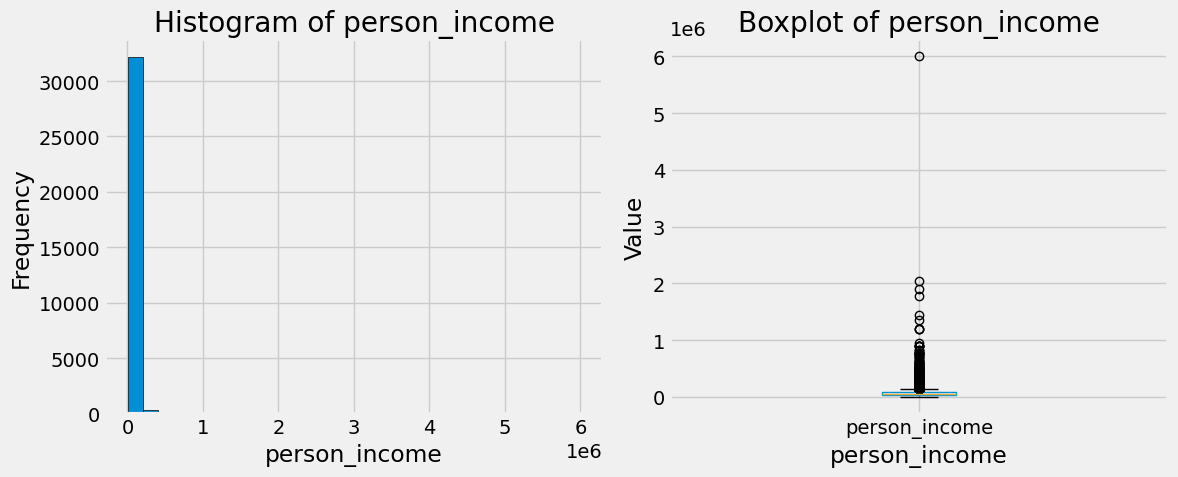

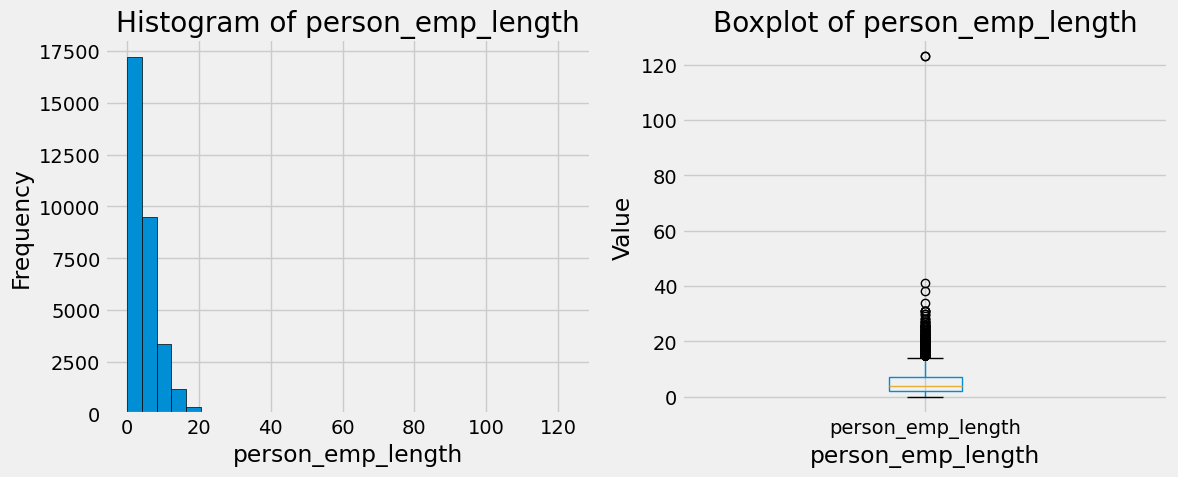

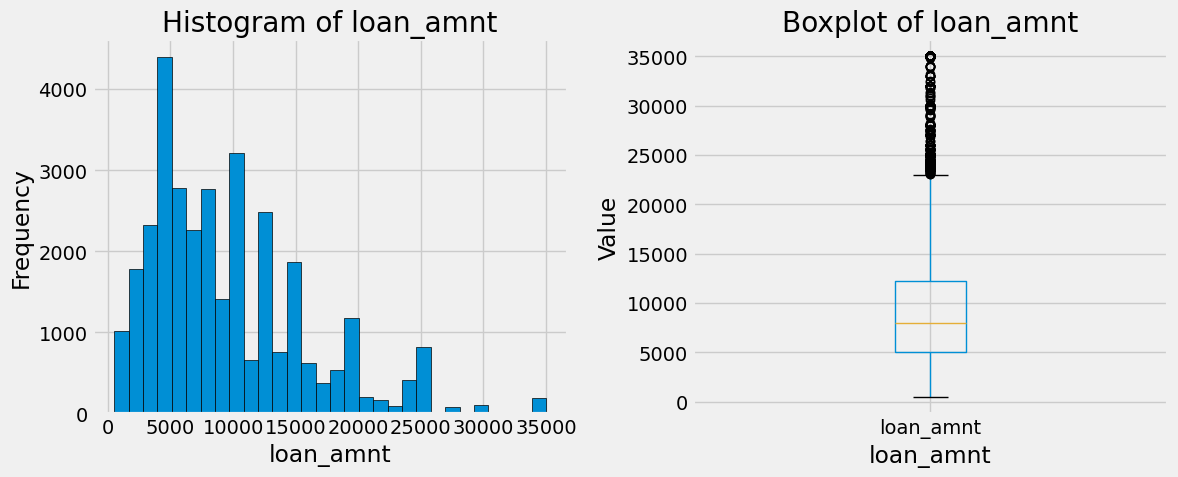

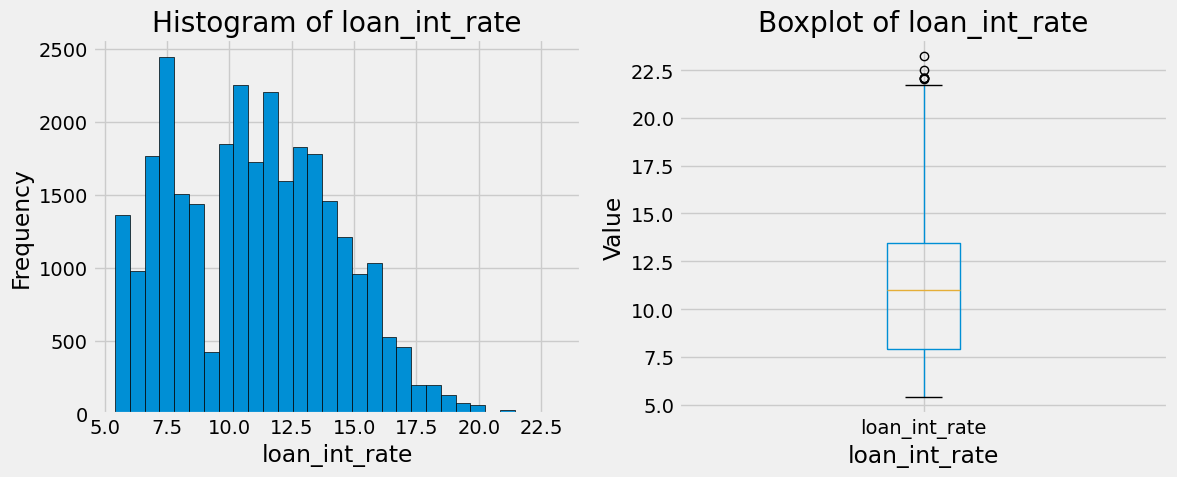

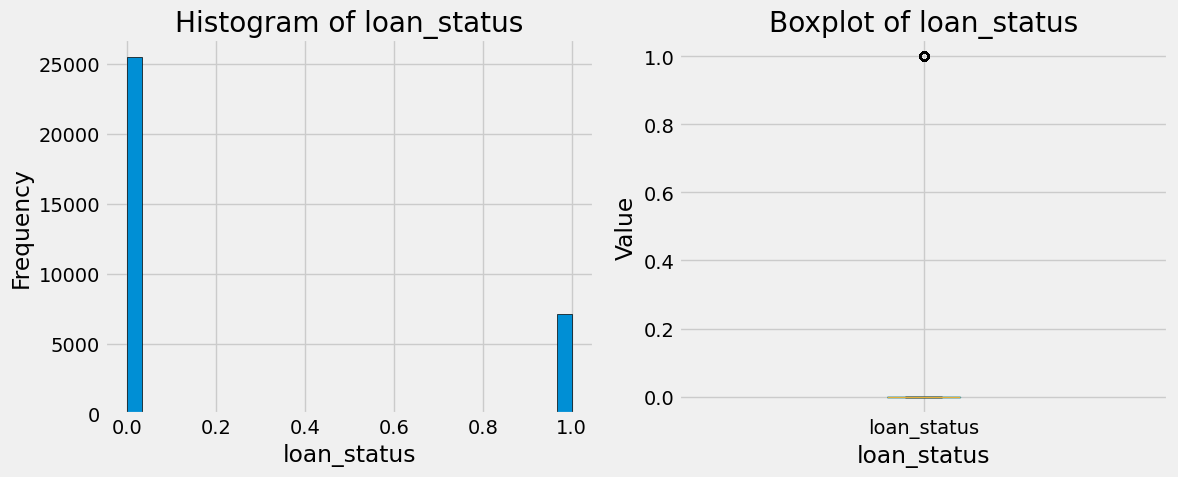

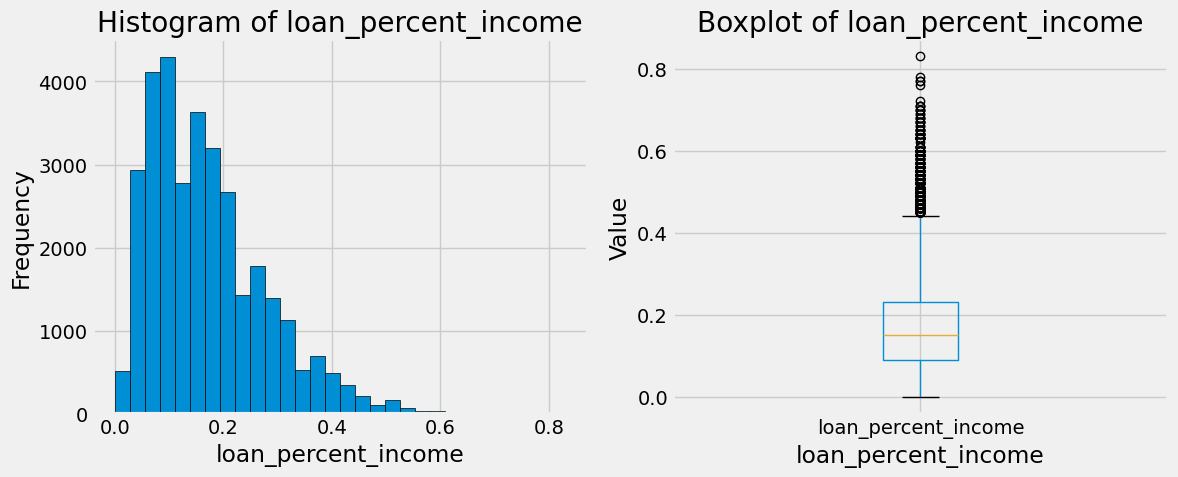

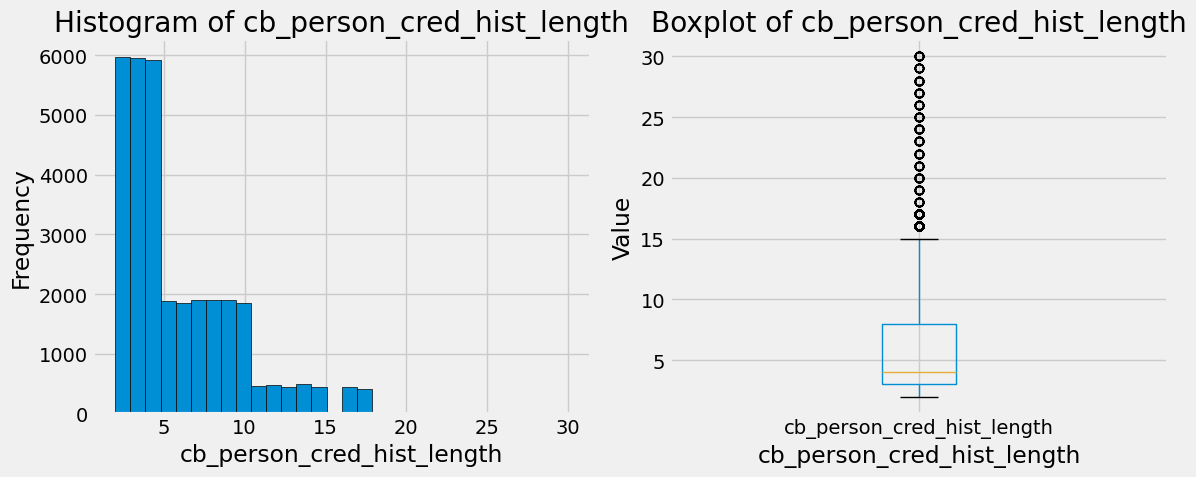

In [30]:
# Assuming df is your DataFrame
numerical_cols = df.select_dtypes("number").columns

plt.style.use('fivethirtyeight')
for numerical_col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 1 row and 2 columns

    # Histogram
    df[numerical_col].hist(ax=axes[0], bins=30, edgecolor='black')
    axes[0].set_title(f"Histogram of {numerical_col}")
    axes[0].set_xlabel(numerical_col)
    axes[0].set_ylabel("Frequency")

    # Boxplot
    df.boxplot(column=numerical_col, ax=axes[1])
    axes[1].set_title(f"Boxplot of {numerical_col}")
    axes[1].set_xlabel(numerical_col)
    axes[1].set_ylabel("Value")

    # Show plots
    plt.tight_layout()
    plt.show()


Suspected outliers inside of the `person_age` where the longest people who ever lived was 122 years old.

In [8]:
df[df["person_age"] > 120]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


Looking at the data the numbers seems authentic. But in real life we might need to confirm about this.

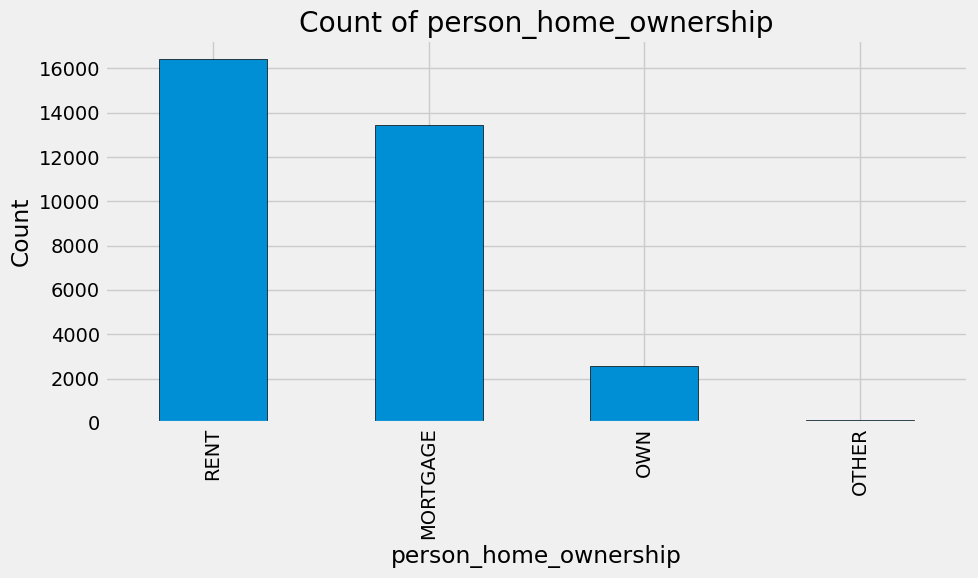

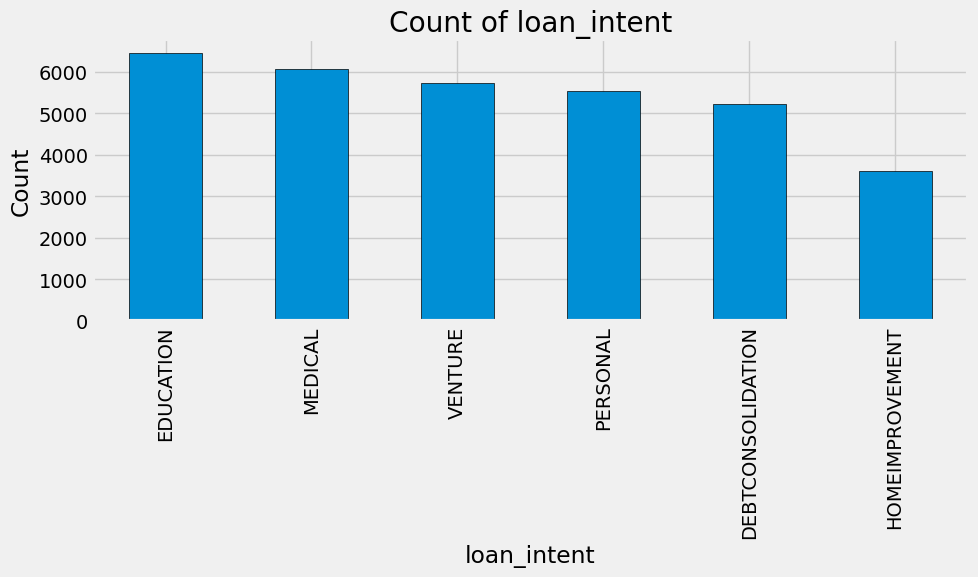

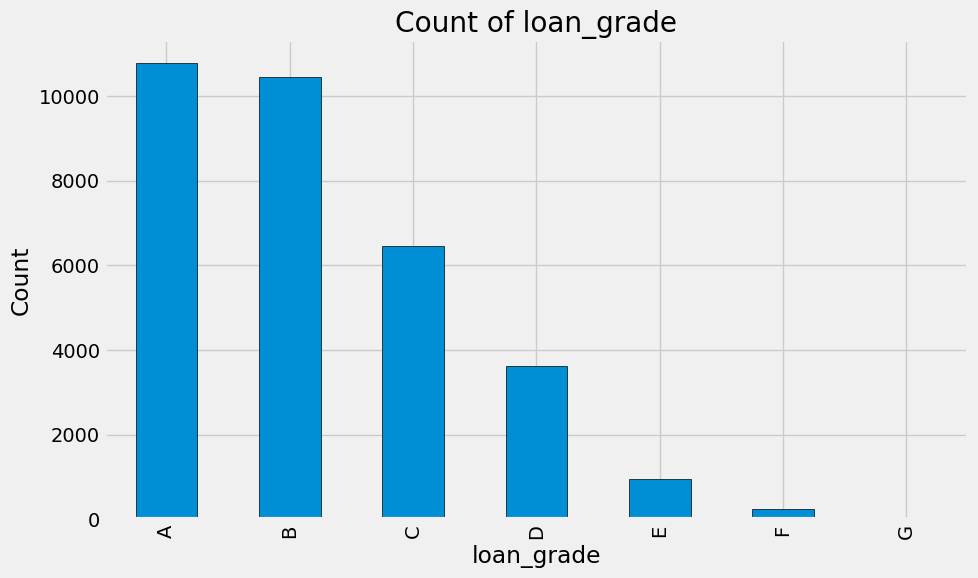

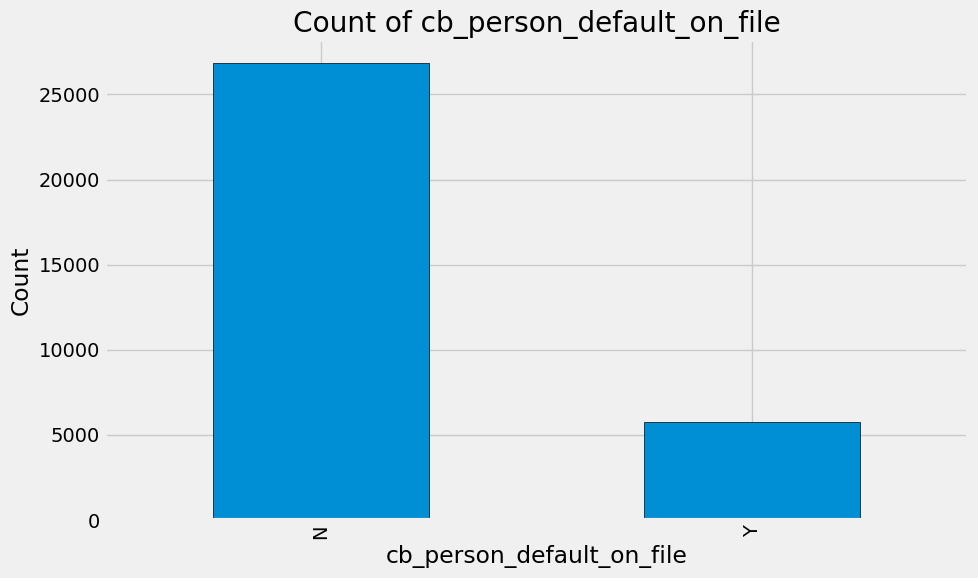

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
categorical_cols = df.select_dtypes("object").columns

plt.style.use('fivethirtyeight')
for categorical_col in categorical_cols:
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure

    # Bar plot
    df[categorical_col].value_counts().plot(kind='bar', ax=ax, edgecolor='black')
    ax.set_title(f"Count of {categorical_col}")
    ax.set_xlabel(categorical_col)
    ax.set_ylabel("Count")

    # Show plot
    plt.tight_layout()
    plt.show()


## Multivariate Analysis

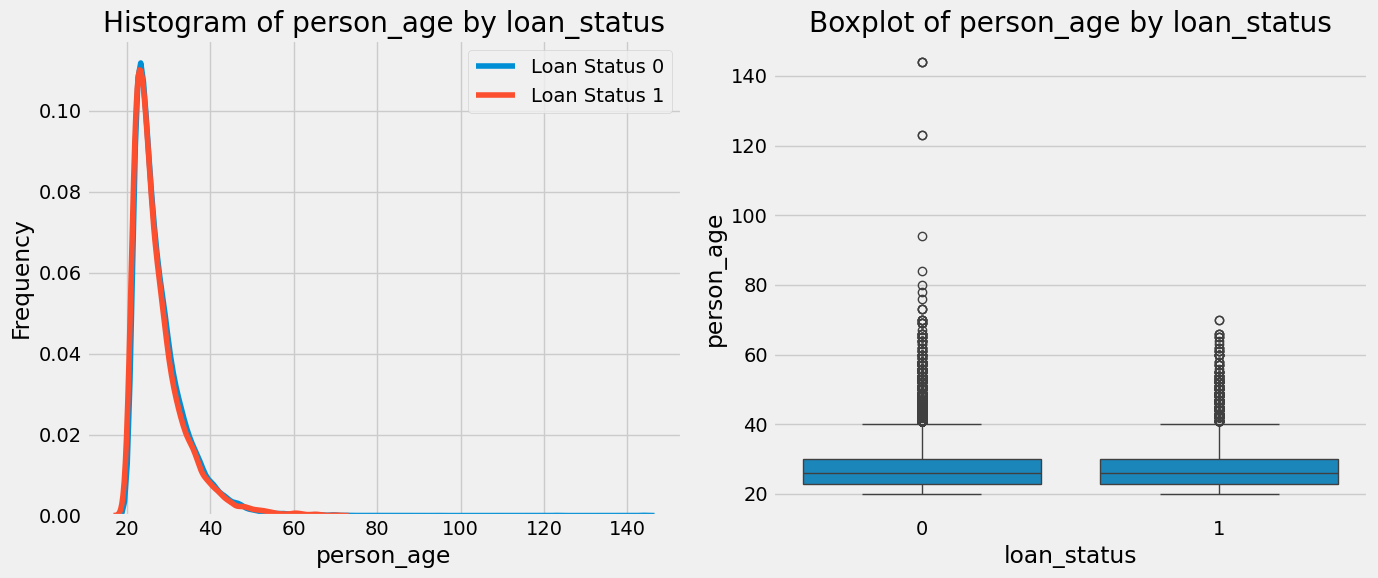

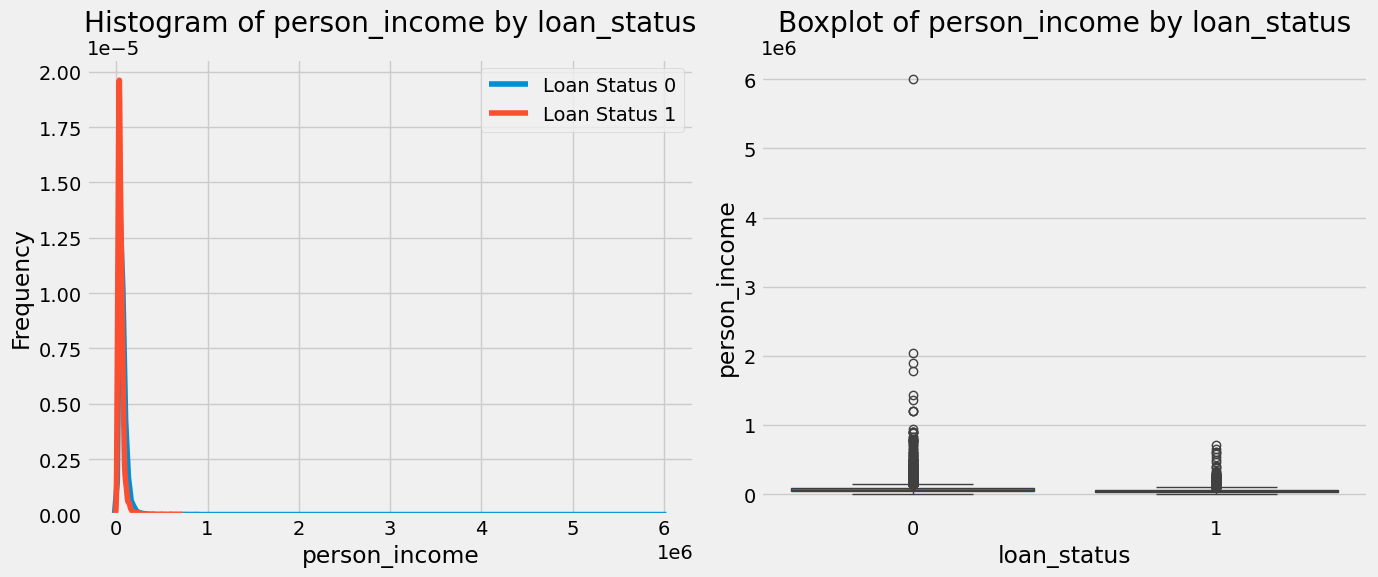

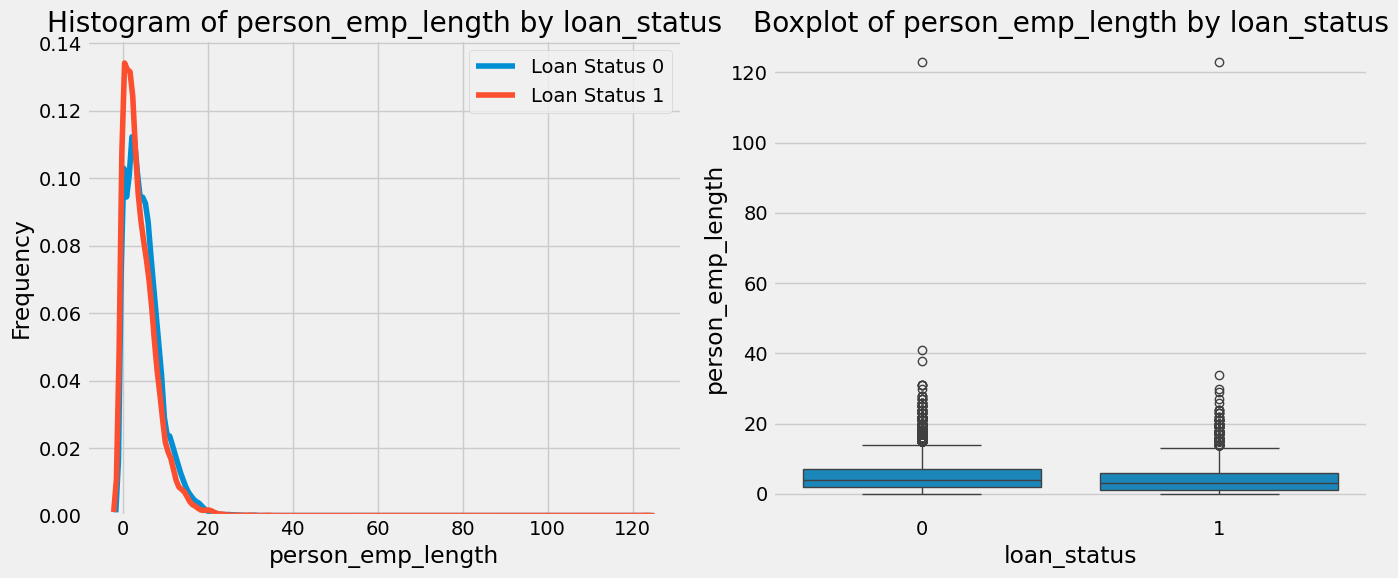

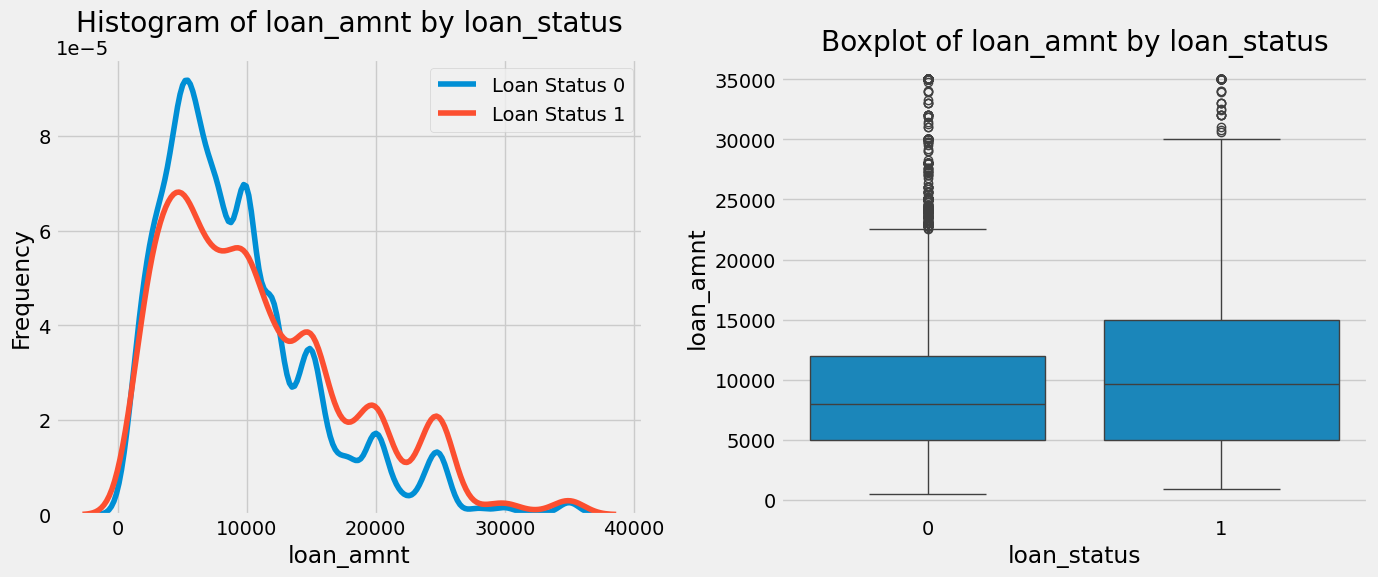

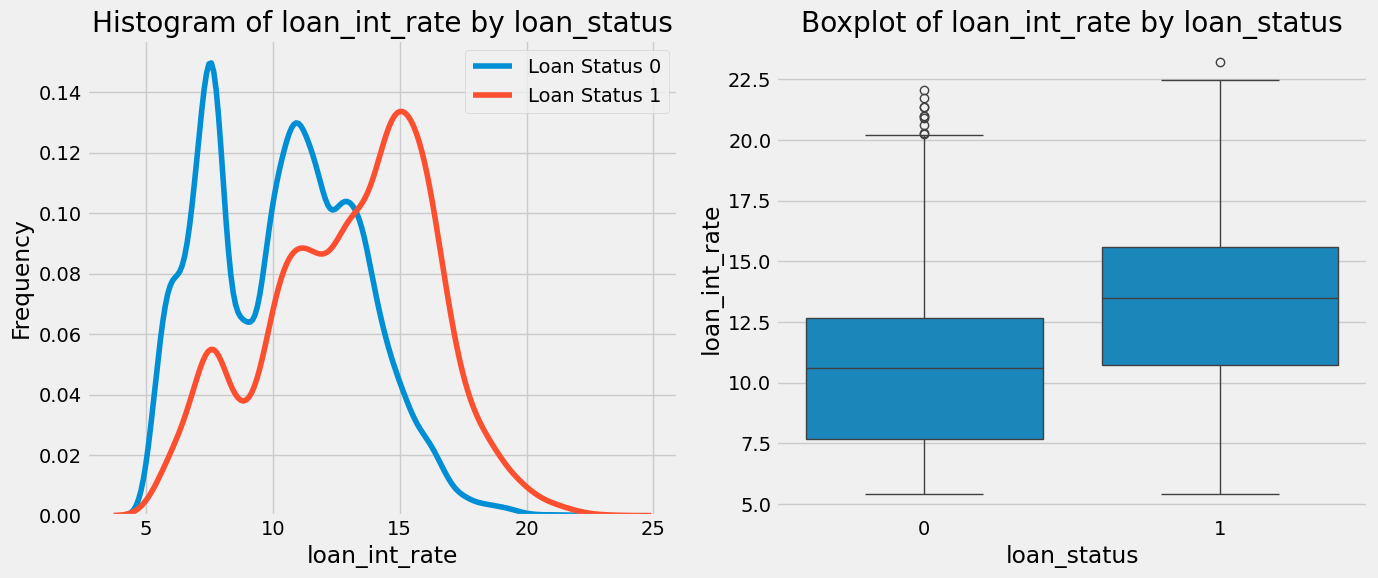

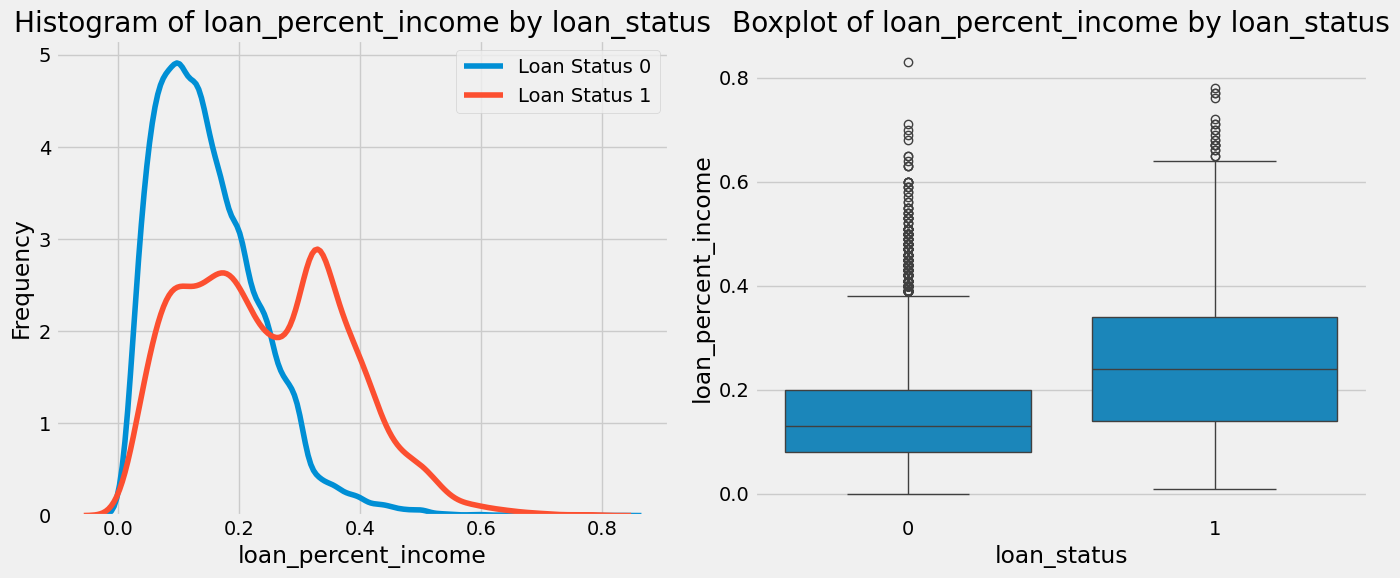

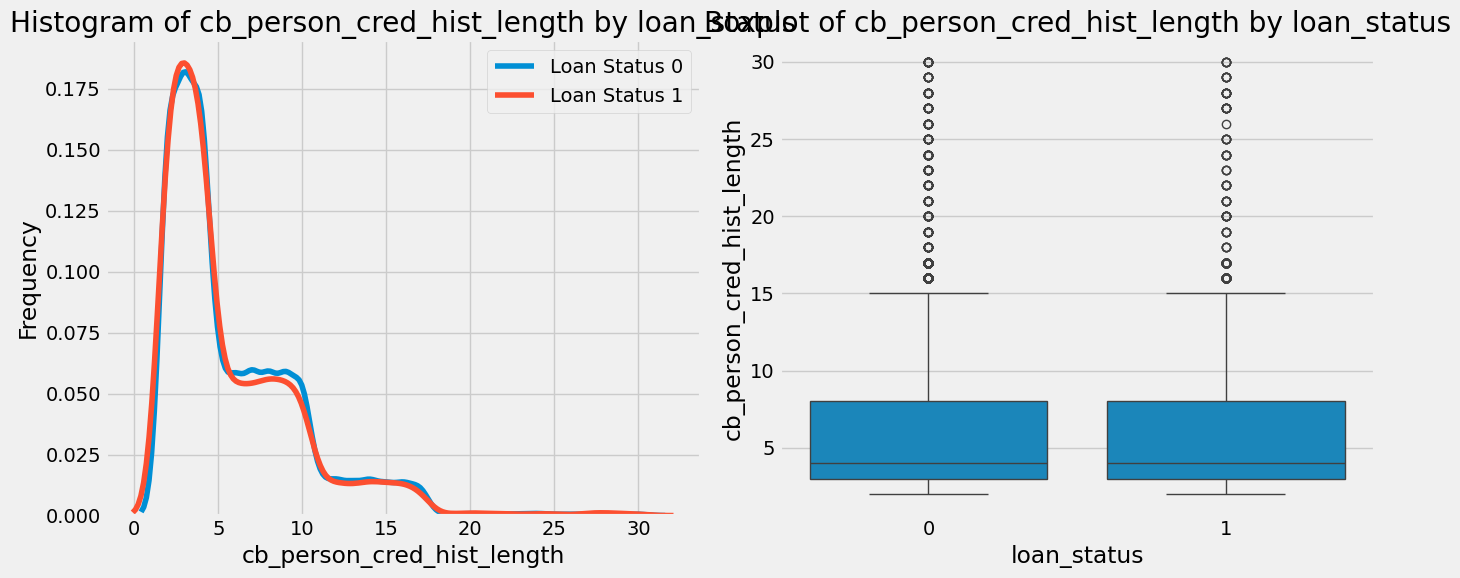

In [24]:
# Assuming df is your DataFrame and "loan_status" is the target variable
numerical_cols = df.select_dtypes("number").columns

plt.style.use('fivethirtyeight')
for numerical_col in numerical_cols:
    if numerical_col != "loan_status":
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Create a figure with 1 row and 2 columns

        # Histogram with hue
        sns.kdeplot(data=df[df["loan_status"]==0], x=numerical_col, multiple='stack', ax=axes[0], label="Loan Status 0", fill=False)
        sns.kdeplot(data=df[df["loan_status"]==1], x=numerical_col, multiple='stack', ax=axes[0], label="Loan Status 1", fill=False)
        axes[0].set_title(f"Histogram of {numerical_col} by loan_status")
        axes[0].set_xlabel(numerical_col)
        axes[0].set_ylabel("Frequency")
        axes[0].legend()

        # Boxplot with hue
        sns.boxplot(data=df, x='loan_status', y=numerical_col, ax=axes[1])
        axes[1].set_title(f"Boxplot of {numerical_col} by loan_status")
        axes[1].set_xlabel('loan_status')
        axes[1].set_ylabel(numerical_col)

        # Show plots
        plt.tight_layout()
        plt.show()


2 features that shows higher chance loan status disapproval: loan percent income is high and loan interest rate are both high

C:\Users\USER\AppData\Local\Temp\ipykernel_2420\3394112968.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


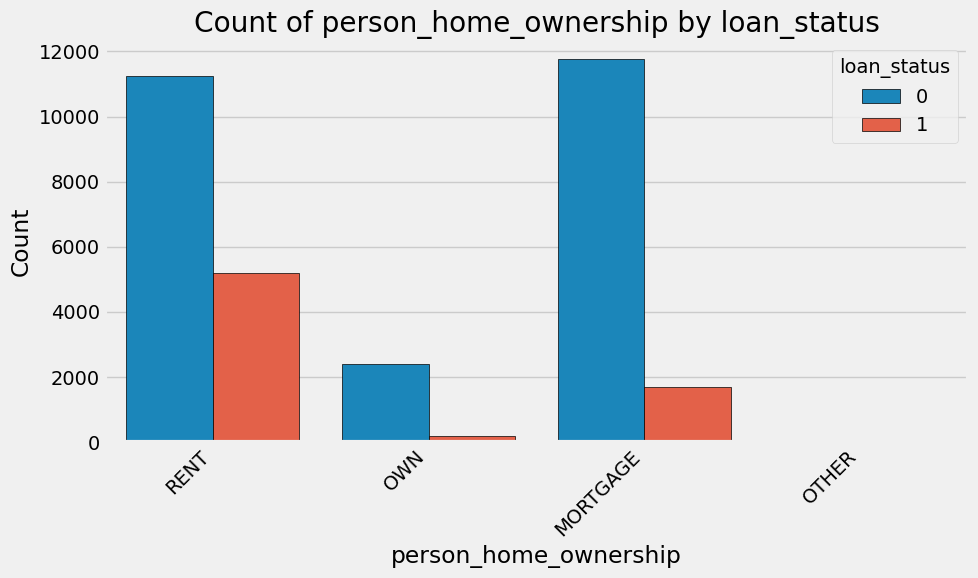

C:\Users\USER\AppData\Local\Temp\ipykernel_2420\3394112968.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


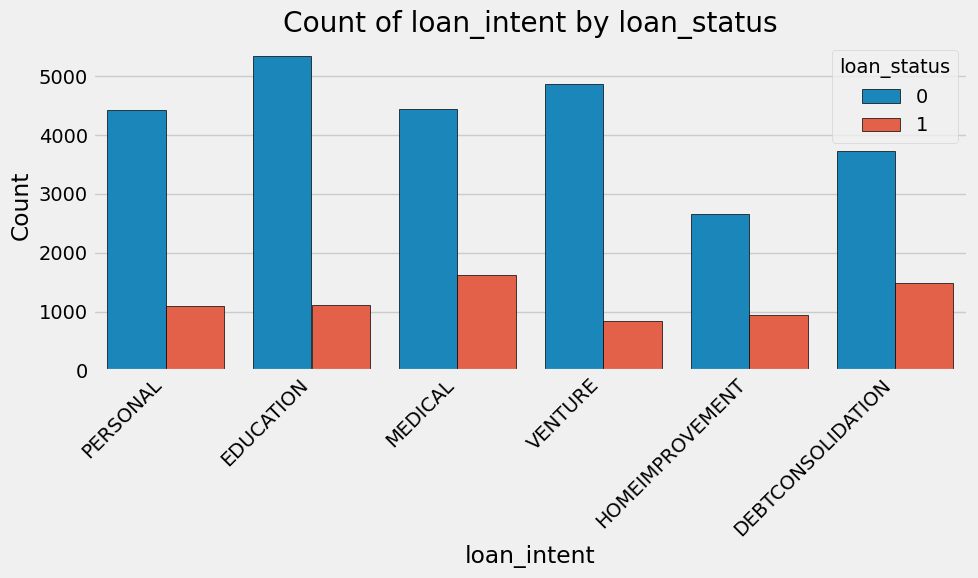

C:\Users\USER\AppData\Local\Temp\ipykernel_2420\3394112968.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


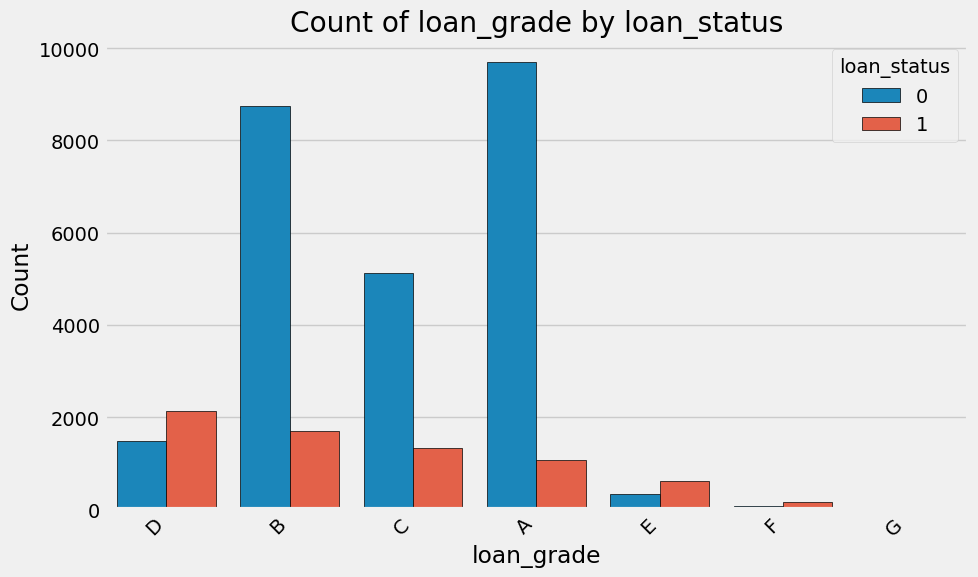

C:\Users\USER\AppData\Local\Temp\ipykernel_2420\3394112968.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


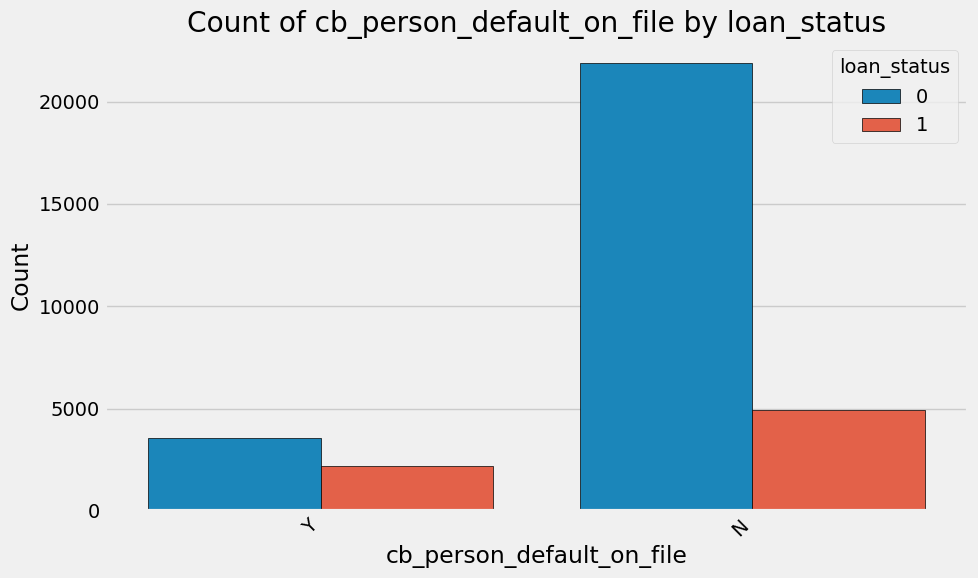

In [35]:
# Assuming df is your DataFrame and "loan_status" is the target variable
categorical_cols = df.select_dtypes("object").columns

plt.style.use('fivethirtyeight')
for categorical_col in categorical_cols:
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure

    # Bar plot with hue
    sns.countplot(data=df, x=categorical_col, hue='loan_status', ax=ax, edgecolor='black')
    ax.set_title(f"Count of {categorical_col} by loan_status")
    ax.set_xlabel(categorical_col)
    ax.set_ylabel("Count")

    # Rotate x labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Show plot
    plt.tight_layout()
    plt.show()
